In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data/US arline Tweets/Tweets.csv")

In [4]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.drop(columns = ["tweet_id","tweet_coord", "airline_sentiment_confidence",	"tweet_created",	"tweet_location",	"user_timezone","negativereason_confidence","negativereason_gold", "airline_sentiment_gold" ], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   negativereason     9178 non-null   object
 2   airline            14640 non-null  object
 3   name               14640 non-null  object
 4   retweet_count      14640 non-null  int64 
 5   text               14640 non-null  object
dtypes: int64(1), object(5)
memory usage: 686.4+ KB


In [ ]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...


In [19]:
df["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [41]:
posair = df[df["airline_sentiment"]=="positive"].groupby("airline",)["airline_sentiment"].count()
posair = pd.DataFrame(posair)
posair.reset_index(inplace =True)
posair.rename(columns = {"airline_sentiment":"Positive"}, inplace = True)
posair

,airline,Positive
0,American,336
1,Delta,544
2,Southwest,570
3,US Airways,269
4,United,492
5,Virgin America,152


In [61]:
nair = df[df["airline_sentiment"]=="negative"].groupby("airline",)["airline_sentiment"].count()
nair = pd.DataFrame(nair)
nair.reset_index(inplace =True)
nair.rename(columns = {"airline_sentiment":"Negative"}, inplace = True)
nair

,airline,Negative
0,American,1960
1,Delta,955
2,Southwest,1186
3,US Airways,2263
4,United,2633
5,Virgin America,181


In [62]:
sent = pd.merge(nair,posair,on= "airline", how = "inner")
sent

,airline,Negative,Positive
0,American,1960,336
1,Delta,955,544
2,Southwest,1186,570
3,US Airways,2263,269
4,United,2633,492
5,Virgin America,181,152


In [63]:
sent["Positive Percentage"] = sent.apply(lambda a: (a["Positive"]/(a["Positive"] + a["Negative"]))*100, axis =1)
sent

,airline,Negative,Positive,Positive Percentage
0,American,1960,336,14.634146
1,Delta,955,544,36.290861
2,Southwest,1186,570,32.460137
3,US Airways,2263,269,10.624013
4,United,2633,492,15.744000
5,Virgin America,181,152,45.645646


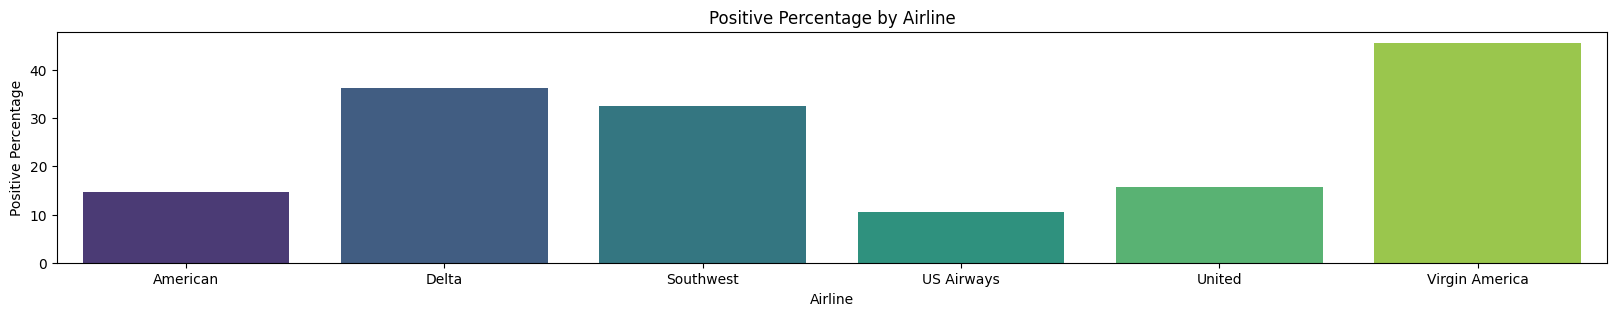

In [64]:
plt.figure(figsize=(20, 3))
sns.barplot ( x = "airline", y = "Positive Percentage", data = sent, palette='viridis')
plt.xlabel('Airline')
plt.title('Positive Percentage by Airline')
plt.show()

* Virgin America, Delta, and Southwest are performing good work in getting positive reviews and having a good customer relationship.
* If the investors are going to invest money in the above-mentioned airline companies it may be profitable for them.
* The other three Airline companies have to look at where their flaws are happening.


## Going into Negatives

In [65]:
df["negativereason"].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [68]:
nr = df.groupby("airline")["negativereason"].count()
nr

airline
American          1960
Delta              955
Southwest         1186
US Airways        2263
United            2633
Virgin America     181
Name: negativereason, dtype: int64

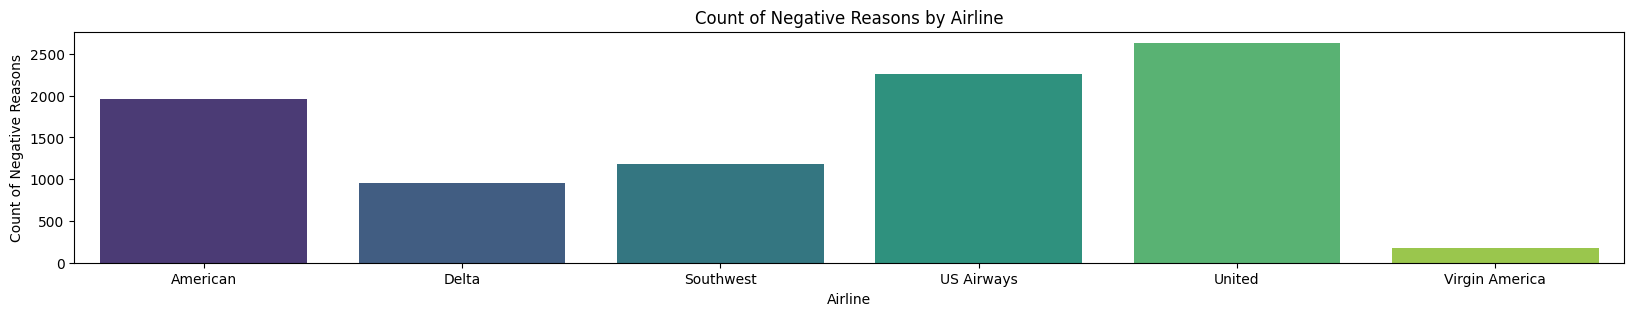

In [69]:
plt.figure(figsize=(20, 3))
sns.barplot(x=nr.index, y=nr.values, palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Count of Negative Reasons')
plt.title('Count of Negative Reasons by Airline')
plt.show()

* From a customer perspective the least Negative reviews got were from Virgin America, Delta and Southwest.
* The above-mentioned companies have a very good Customer Relationship and will get better returns.
* American, US Airways and United have a large number of negative reviews, So these airlines should see where they are lagging and sort them out.


In [72]:
neg_air= df.groupby(["airline", "negativereason"])["negativereason"].count()

In [73]:
neg_air

airline         negativereason             
American        Bad Flight                      87
                Can't Tell                     198
                Cancelled Flight               246
                Customer Service Issue         768
                Damaged Luggage                 12
                Flight Attendant Complaints     87
                Flight Booking Problems        130
                Late Flight                    249
                Lost Luggage                   149
                longlines                       34
Delta           Bad Flight                      64
                Can't Tell                     186
                Cancelled Flight                51
                Customer Service Issue         199
                Damaged Luggage                 11
                Flight Attendant Complaints     60
                Flight Booking Problems         44
                Late Flight                    269
                Lost Luggage          

* Here is where each company has to look where they are lagging in and sort it out.

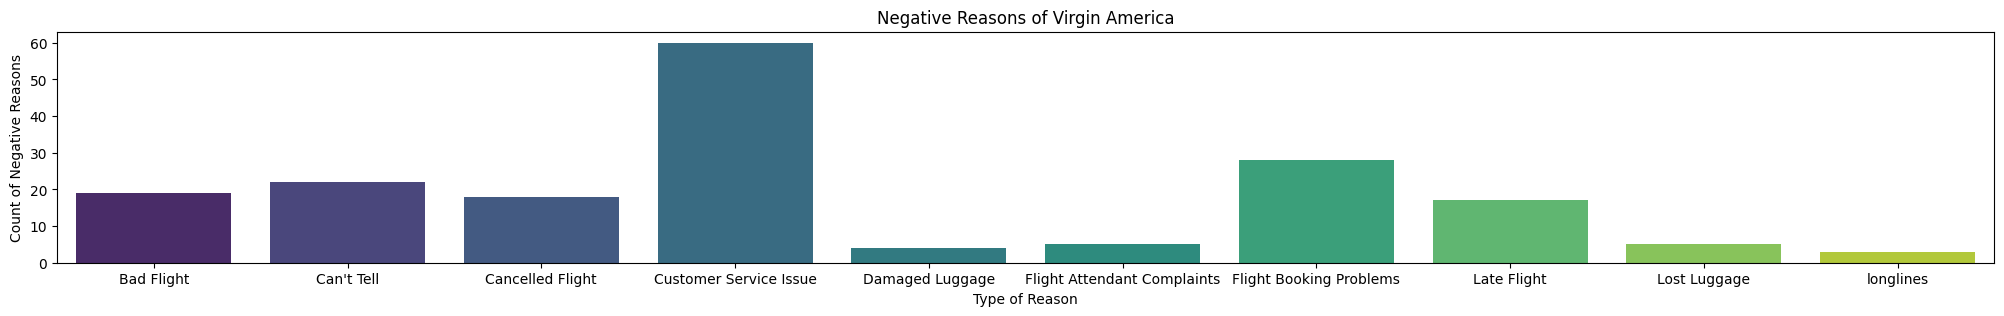

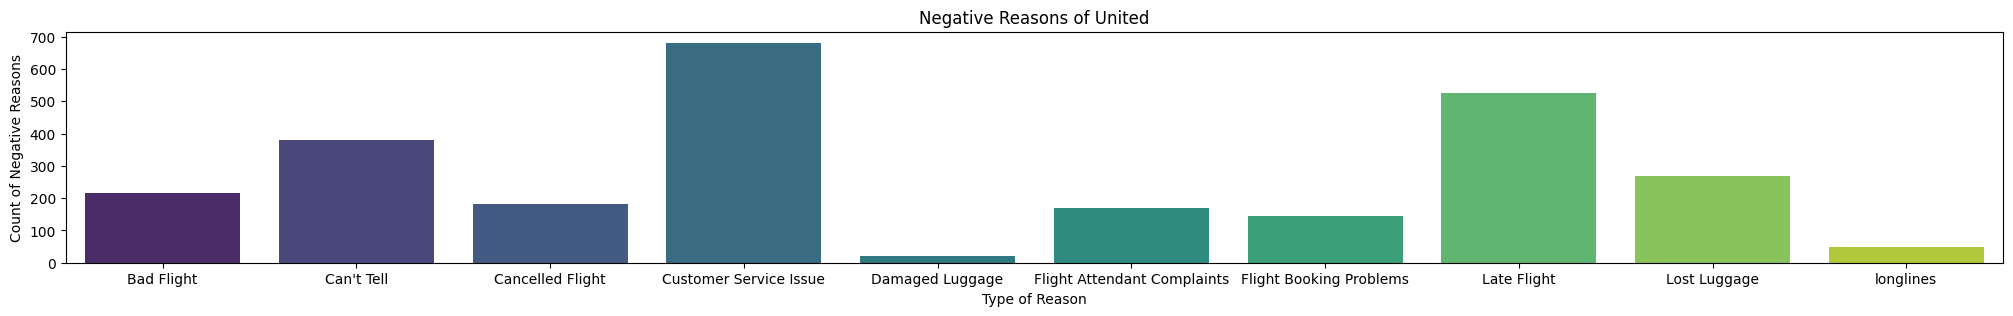

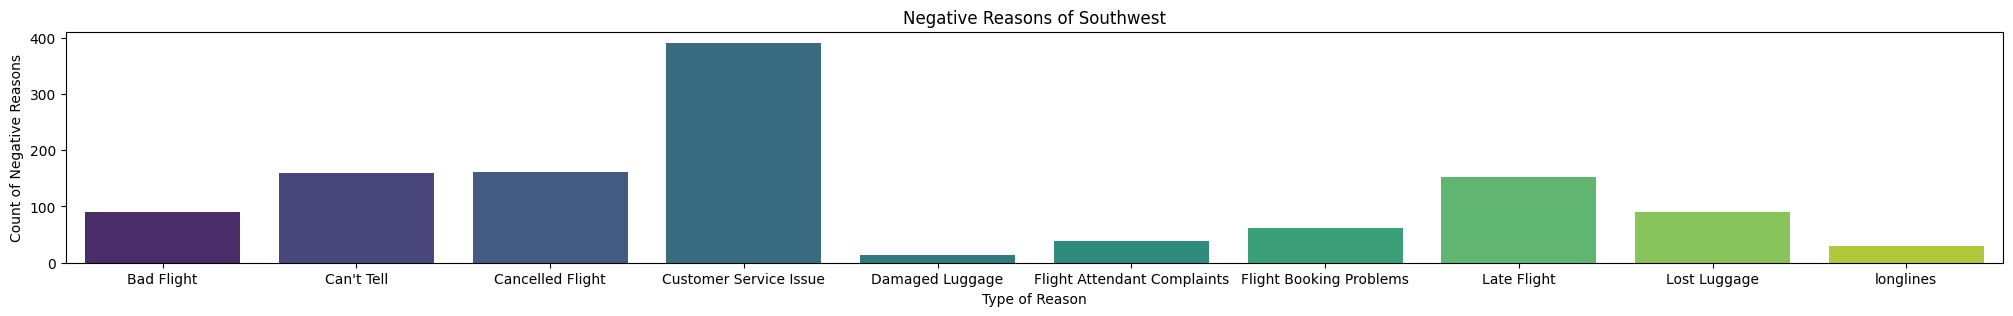

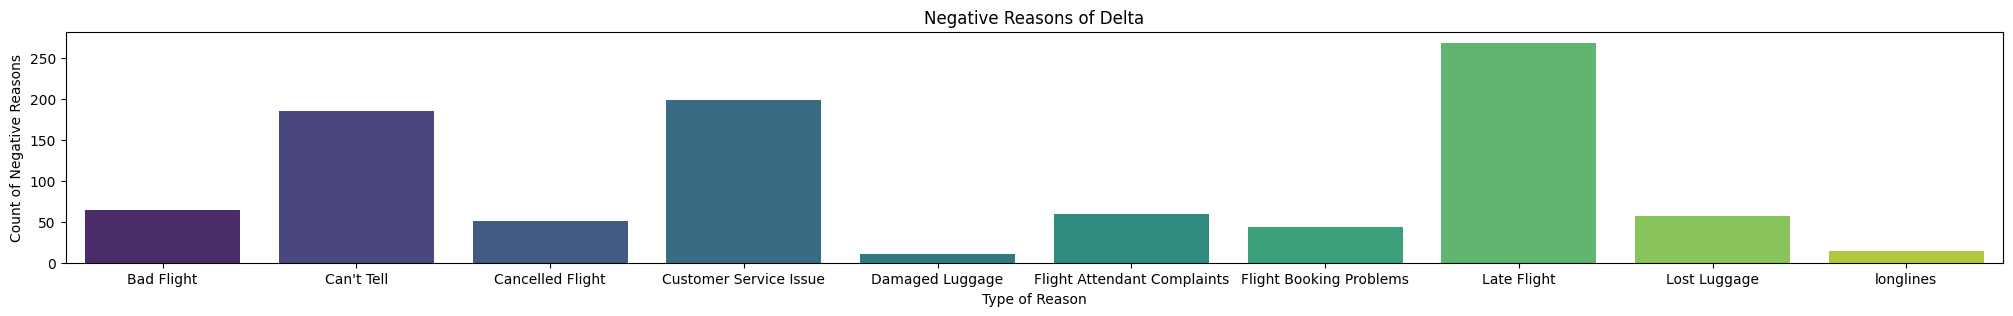

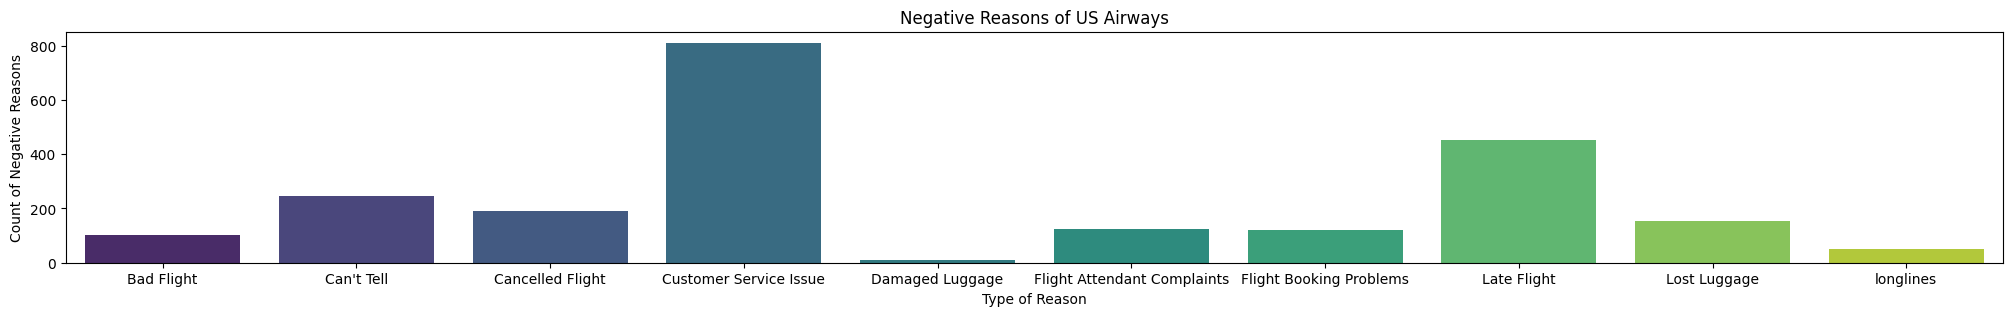

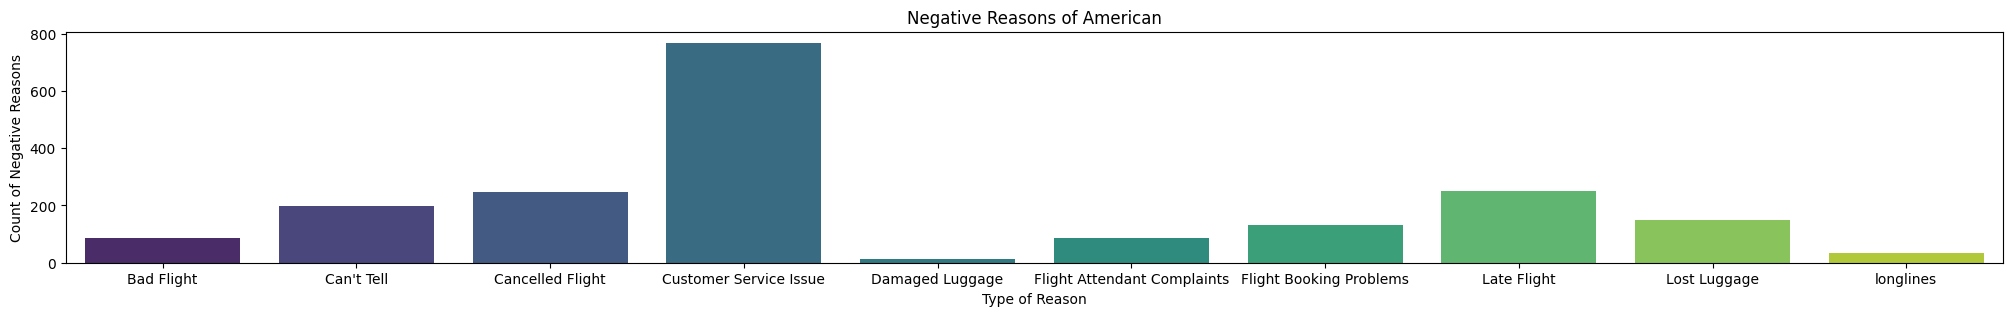

In [74]:
a = df["airline"].unique()
for i in range(len(a)):
  ar = df[df["airline"] == a[i]]
  neg= ar.groupby("negativereason")["negativereason"].count()
  plt.figure(figsize=(25, 3))
  ax = sns.barplot(x=neg.index, y=neg.values, palette='viridis')
  plt.xlabel('Type of Reason')
  plt.ylabel('Count of Negative Reasons')
  plt.title(f'Negative Reasons of {a[i]}')
  plt.show()


In [75]:
sent_retwt = df.groupby("airline_sentiment")["retweet_count"].sum()
sent_retwt

airline_sentiment
negative    857
neutral     189
positive    164
Name: retweet_count, dtype: int64

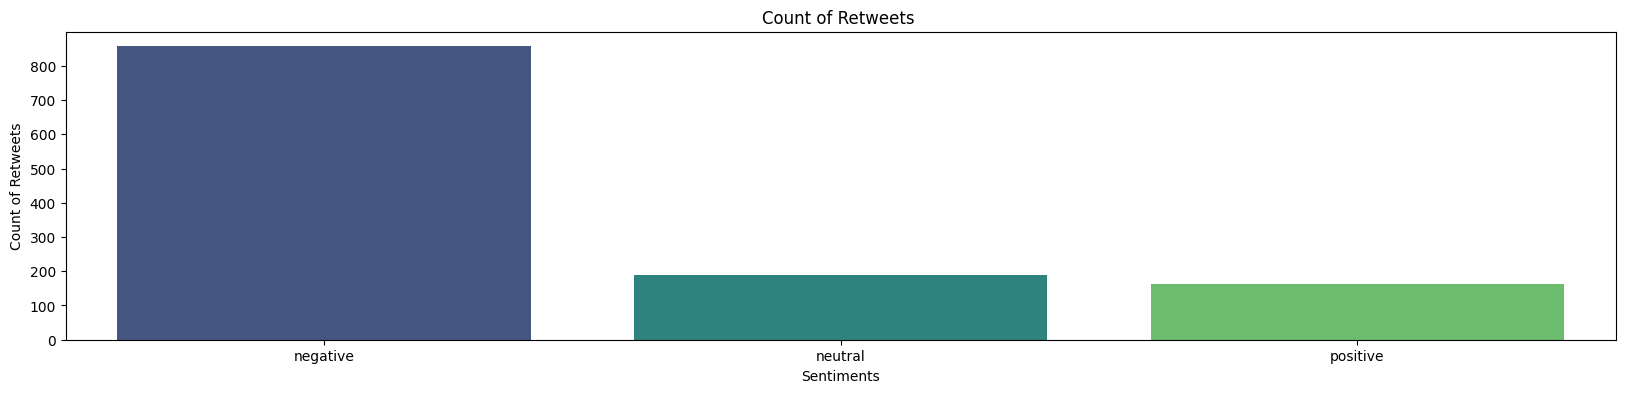

In [77]:
plt.figure(figsize=(20, 4))
sns.barplot(x=sent_retwt.index, y=sent_retwt.values, palette='viridis')
plt.xlabel('Sentiments')
plt.ylabel('Count of Retweets')
plt.title('Count of Retweets ')
plt.show()

* More than positive tweets, negative tweets got retweeted most of the time. If you are giving a comeback, it is more important to get positive reviews from customers again and again to build a good reputation. Every company should be more responsible in this because the negatives will spread more than the positives in social media.

## Making a sentimental Analysis Model

In [ ]:
df1 = df[["text","airline_sentiment"]]
df1

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [ ]:
import re
import string
from tqdm.auto import tqdm
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# some text cleaning functions
def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc



In [ ]:
df1['text'] = df1['text'].apply(lambda x: convert_to_lower(x))
df1['text'] = df1['text'].apply(lambda x: remove_numbers(x))
df1['text'] = df1['text'].apply(lambda x: remove_punctuation(x))
df1['text'] = df1['text'].apply(lambda x: remove_stopwords(x))
df1['text'] = df1['text'].apply(lambda x: remove_extra_white_spaces(x))
df1['text'] = df1['text'].apply(lambda x: lemmatizing(x))

<ipython-input-10-b775ae4a2ac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(lambda x: convert_to_lower(x))
<ipython-input-10-b775ae4a2ac8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(lambda x: remove_numbers(x))
<ipython-input-10-b775ae4a2ac8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['airline_sentiment'] = label_encoder.fit_transform(df['airline_sentiment'])


<ipython-input-11-994cf7e631ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['airline_sentiment'] = label_encoder.fit_transform(df['airline_sentiment'])


In [ ]:
df1

,text,airline_sentiment
0,virginamerica dhepburn said,1
1,virginamerica plus youve added commercial expe...,2
2,virginamerica didnt today must mean need take ...,1
3,virginamerica really aggressive blast obnoxiou...,0
4,virginamerica really big bad thing,0
...,...,...
14635,americanair thank got different flight chicago,2
14636,americanair leaving minute late flight warning...,0
14637,americanair please bring american airline blac...,1
14638,americanair money change flight dont answer ph...,0


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 38.2 MB/s eta 0:00:00


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Split the dataset into train, validation, and test sets
# Split the dataset into train, validation, and test sets
train_data, val_test_data = train_test_split(df1, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)



# Extract text and labels from the dataset
train_texts = train_data['text'].tolist()
train_labels = train_data['airline_sentiment'].tolist()
val_texts = val_data['text'].tolist()
val_labels = val_data['airline_sentiment'].tolist()
test_texts = test_data['text'].tolist()
test_labels = test_data['airline_sentiment'].tolist()

# Set the device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Tokenize and convert text data to tensors
def tokenize_and_encode(texts, labels, tokenizer):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=128,  # Adjust as needed
            padding="max_length",
            truncation=True,
            return_tensors="pt",
            return_attention_mask=True,
        )
        input_ids.append(encoded_dict["input_ids"])
        attention_masks.append(encoded_dict["attention_mask"])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)
    return TensorDataset(input_ids, attention_masks, labels)



In [ ]:
# Create DataLoader for training, validation, and test sets
train_dataset = tokenize_and_encode(train_texts, train_labels, tokenizer)
val_dataset = tokenize_and_encode(val_texts, val_labels, tokenizer)
test_dataset = tokenize_and_encode(test_texts, test_labels, tokenizer)


In [ ]:
batch_size = 32  # Adjust as needed
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 10

# Define training parameters
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * num_epochs,
)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping to prevent exploding gradients
        optimizer.step()
        scheduler.step()

    # Validation
    model.eval()
    val_predictions = []
    val_true_labels = []

    with torch.no_grad():
        for batch in val_dataloader:
            batch = tuple(t.to(device) for t in batch)
            input_ids, attention_mask, labels = batch

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            val_predictions.extend(preds.tolist())
            val_true_labels.extend(labels.tolist())

    val_accuracy = accuracy_score(val_true_labels, val_predictions)
    print(f"Epoch {epoch + 1}/{num_epochs} - Validation Accuracy: {val_accuracy}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), "best_bert_model.pt")

# Load the model and evaluate on the test set
model.load_state_dict(torch.load("best_bert_model.pt"))
model.eval()

test_predictions = []
test_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_mask, labels = batch

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        test_predictions.extend(preds.tolist())
        test_true_labels.extend(labels.tolist())

test_accuracy = accuracy_score(test_true_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report for more detailed evaluation
class_names = ["negative","neutral","positive"]  # Define your 3 sentiment types
report = classification_report(test_true_labels, test_predictions, target_names=class_names)
print(report)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10 - Validation Accuracy: 0.8066939890710383
Epoch 2/10 - Validation Accuracy: 0.8148907103825137
Epoch 3/10 - Validation Accuracy: 0.8101092896174863
Epoch 4/10 - Validation Accuracy: 0.8025956284153005
Epoch 5/10 - Validation Accuracy: 0.8087431693989071
Epoch 6/10 - Validation Accuracy: 0.8005464480874317
Epoch 7/10 - Validation Accuracy: 0.7909836065573771
Epoch 8/10 - Validation Accuracy: 0.8039617486338798
Epoch 9/10 - Validation Accuracy: 0.8080601092896175
Epoch 10/10 - Validation Accuracy: 0.8060109289617486
Test Accuracy: 0.8162568306010929
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89       959
     neutral       0.63      0.64      0.64       293
    positive       0.75      0.75      0.75       212

    accuracy                           0.82      1464
   macro avg       0.76      0.76      0.76      1464
weighted avg       0.82      0.82      0.82      1464

